# 2 parameter bayesian linear regression
## prior -> Normal distribution

In [9]:
import torch
import matplotlib.pyplot as plt

prior_mean = torch.tensor([0.0, 0.0])
prior_cov = torch.tensor([[1.,0],[0,1.]])
b = 1

def multivariate_normal(prior_mean, prior_cov):
    return torch.distributions.MultivariateNormal(prior_mean, prior_cov)
prior_dist = multivariate_normal(prior_mean, prior_cov)

In [10]:
def plot_contourf_dist(dist, colour=None, alpha=None, linestyle=None, x=None, y=None):
    if x is None:
        x = torch.linspace(-5, 5, 1000)
    if y is None:
        y = torch.linspace(-5, 5, 1000)
    X, Y = torch.meshgrid(x, y)
    Z = torch.stack([X, Y], dim=-1)
    z = dist.log_prob(Z).exp()
    z = z.detach().numpy()
    if colour is None:
        colour = 'viridis'
    if alpha is None:
        alpha = 1
    if linestyle is None:
        linestyle = 'solid'
    
    # plot a single point in red colour and also label its grid point
    plt.plot(2, 3, 'ro', label='true theta', markersize=7, marker='x')
    plt.text(2, 3, 'true theta', fontsize=10, color='white')
    plt.contourf(X, Y, z , levels = 20, cmap = colour, alpha = alpha, linestyles = linestyle)
    # plt.plot(dist.mean[0], dist.mean[1], 'ro', label='theta map', markersize=7)
    # plt.text(dist.mean[0], dist.mean[1], 'theta map', fontsize=10, color='white')
    plt.title('Posterior Distribution')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.colorbar()
    plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/3288201228.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(2, 3, 'ro', label='true theta', markersize=7, marker='x')


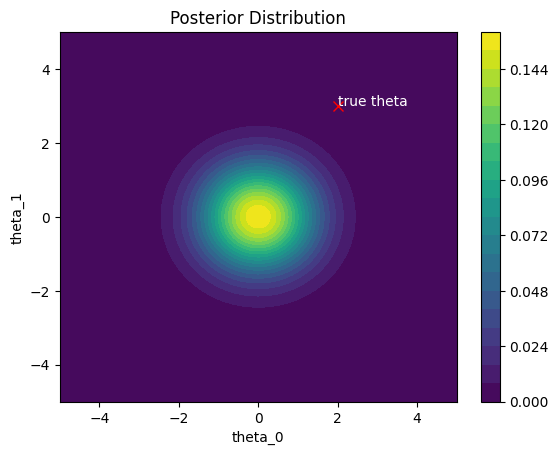

In [11]:
# Plot contour plot of the distribution
def plot_contour_dist(dist, colour=None, alpha=None, linestyle=None, x=None, y=None):
    if x is None:
        x = torch.linspace(-5, 5, 1000)
    if y is None:
        y = torch.linspace(-5, 5, 1000)
    X, Y = torch.meshgrid(x, y)
    Z = torch.stack([X, Y], dim=-1)
    z = dist.log_prob(Z).exp()
    z = z.detach().numpy()
    if colour is None:
        colour = 'viridis'
    if alpha is None:
        alpha = 1
    if linestyle is None:
        linestyle = 'solid'
    plt.contour(X, Y, z , levels = 20, cmap = colour, alpha = alpha, linestyles = linestyle)
    plt.colorbar()
    # plt.show()

plot_contourf_dist(prior_dist)
plt.show()

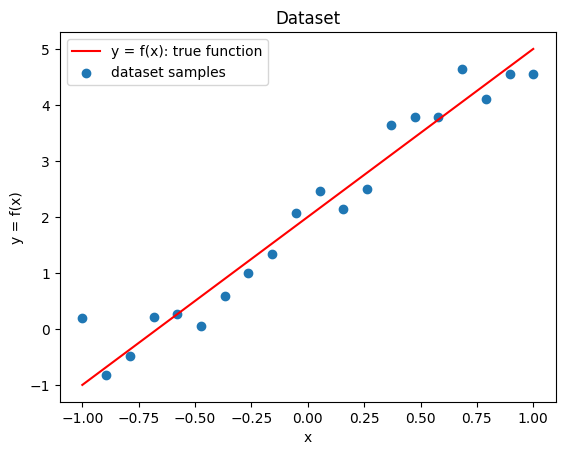

In [12]:
# dataset

sigma = 0.5

def f(x):
    return 3 * x + 2

def generate_dataset(n):
    noise = torch.distributions.Normal(0, sigma).sample((n,))
    x = torch.linspace(-1, 1, n)
    y = f(x) + noise
    return x, y

# Plot dataset
def plot_linear_dataset(x,y):
    plt.plot(x,f(x), color='red', label='y = f(x): true function')
    plt.scatter(x, y, label='dataset samples')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y = f(x)')
    plt.title('Dataset')
    plt.show()

x, y = generate_dataset(20)
plot_linear_dataset(x,y)
# plt.plot(x,f(x), color='red', label='f(x) = 3x+2')
# plt.scatter(x, y, label='dataset samples')
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y = f(x)')
# plt.title('Dataset')
# plt.show()


In [13]:
# likelihood

def forward(x, theta):
    return x*theta[1] + theta[0]

def log_likelihood(theta, x=x, y=y):
    mu = forward(x, theta)
    sigma = torch.tensor(0.5)
    dist = torch.distributions.Normal(mu, sigma)
    return dist.log_prob(y).sum()

log_likelihood(torch.tensor([0.0, 3.0]))
log_likelihood(torch.tensor([2.0, 3.0]))

tensor(-11.3418)

In [14]:
def log_prior(theta):
    return prior_dist.log_prob(theta).sum()

In [15]:
def log_posterior(theta, x=x, y=y):
    return log_likelihood(theta, x, y) + log_prior(theta)

In [16]:
# code to plot likelihood

def plot_likelihood(theta_mle=None, x=None, y=None):
    theta_0 = torch.linspace(-20, 20, 100)
    theta_1 = torch.linspace(-20, 20, 100)
    theta_0, theta_1 = torch.meshgrid(theta_0, theta_1)
    theta = torch.stack([theta_0, theta_1], dim=-1)
    # print(theta.shape)
    # print(theta)
    log_likelihood_values = torch.zeros_like(theta_0)

    # Calculate the log likelihood for each combination of theta_0 and theta_1
    for i in range(len(theta_0)):
        for j in range(len(theta_1)):
            theta = torch.tensor([theta_0[i, j], theta_1[i, j]])
            likelihood = log_likelihood(theta, x, y)
            log_likelihood_values[i, j] = likelihood

    # Create a contour plot
    plt.figure(figsize=(8, 6))
    plt.contourf(theta_0, theta_1, log_likelihood_values, levels=20, cmap='viridis')
    # likelihood = log_likelihood(theta)
    # likelihood = likelihood.exp()
    # plt.contourf(theta_0, theta_1, likelihood, levels = 20, cmap = 'viridis', alpha = 1, linestyles = 'solid')
    plt.plot(theta_mle[0], theta_mle[1], 'ro', label='theta_mle', markersize=7, marker='x')
    plt.text(theta_mle[0], theta_mle[1], 'theta_mle', fontsize=10, color='black')
    plt.colorbar()
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Log Likelihood')
    plt.show()

In [17]:
# theta mle using closed form solution

import numpy as np

# Assuming X and y are your input features and target values
X = np.column_stack((np.ones_like(x), x))

# Calculate the coefficients using the closed-form solution
theta_mle = np.linalg.inv(X.T @ X) @ X.T @ np.array(y)
theta_mle

array([2.0285122, 2.8882556], dtype=float32)

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/638850595.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(theta_mle[0], theta_mle[1], 'ro', label='theta_mle', markersize=7, marker='x')


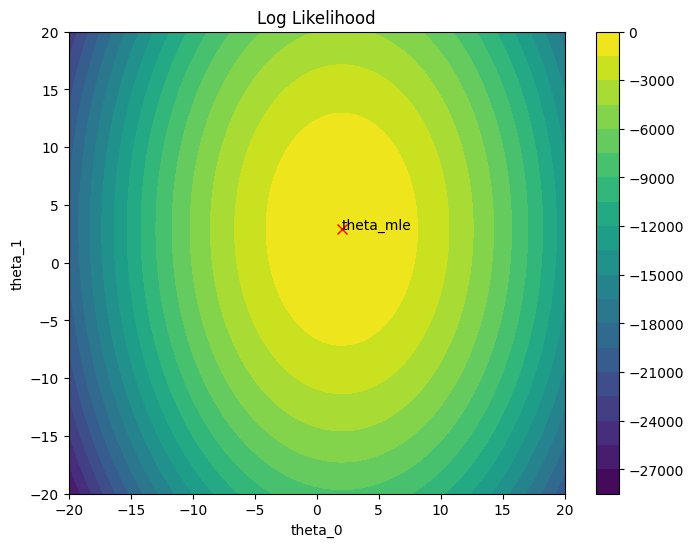

In [18]:
plot_likelihood(theta_mle, x, y)

In [19]:
# theta map using closed form solution

theta_map = np.linalg.inv(X.T @ X + (sigma/b)**2) @ X.T @ np.array(y)
theta_map

array([1.9697793, 2.728838 ], dtype=float32)

In [20]:
X = torch.tensor(np.column_stack((np.ones_like(x), x)))
# sigma_posterior = torch.inverse((X.T @ X) / ((sigma)**2) + (1/b) * torch.inverse(torch.eye(2)))

sigma_posterior = torch.inverse((X.T @ X) / ((sigma)**2) + (1/b) * torch.inverse(torch.eye(2)))
print(sigma_posterior)
mean_posterior = sigma_posterior @ ((X.T @ np.array(y)) / ((sigma)**2) + (prior_mean/b))
print(mean_posterior)

tensor([[ 1.2346e-02, -2.8977e-10],
        [-2.8977e-10,  3.2815e-02]])
tensor([2.0035, 2.7935])


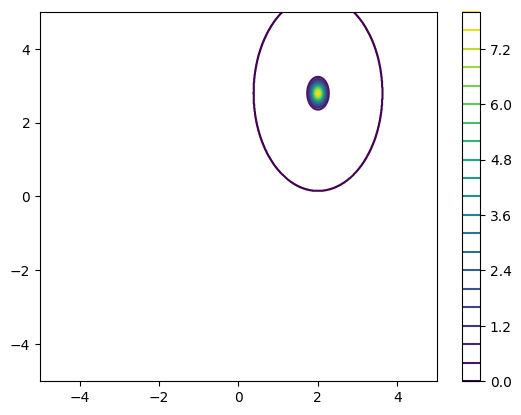

In [21]:
theta_posterior = torch.distributions.MultivariateNormal(mean_posterior, sigma_posterior)

# Plot the posterior

plot_contour_dist(theta_posterior)
plt.show()

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/3288201228.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(2, 3, 'ro', label='true theta', markersize=7, marker='x')


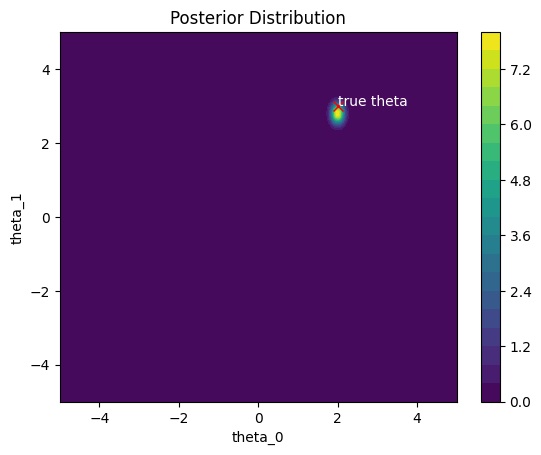

In [22]:
plot_contourf_dist(theta_posterior)

In [23]:
def predictive_dist(x , mean_pos , cov_pos , var_likelihood):
    return torch.distributions.Normal(torch.matmul(x , mean_pos.T) , var_likelihood + torch.matmul(x , torch.matmul(cov_pos , x.T)))

In [24]:
prediction_dists = []
n=20
for i in range(n):
    prediction_dists.append(predictive_dist(X[i] , mean_posterior , sigma_posterior , sigma**2))

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/30084799.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3575.)
  return torch.distributions.Normal(torch.matmul(x , mean_pos.T) , var_likelihood + torch.matmul(x , torch.matmul(cov_pos , x.T)))


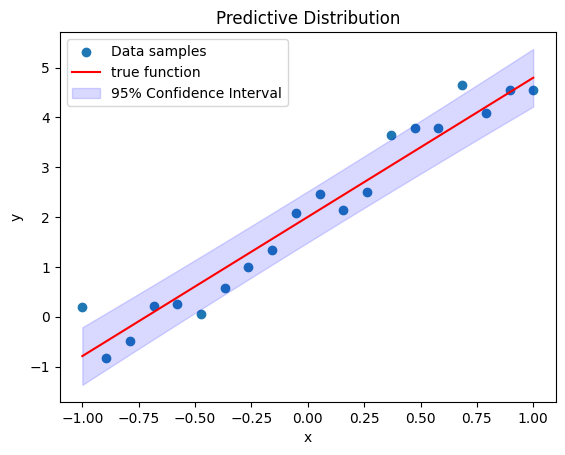

In [25]:
# Plot the prediction as a gradient with the color opacity how confident the model is
def plot_predictions(prediction_dists , X , Y):
    x_new = X[:,1]  
    plt.scatter(x_new , Y)
    y_mean = []
    y_var = []
    for i in range(n):
        dist = prediction_dists[i]
        y_mean.append(dist.mean)
        y_var.append(dist.variance)

    plt.plot(x_new , y_mean, color = 'red')
    y_upper = []
    y_lower = []
    for i in range(n):
        y_upper.append((y_mean[i] + 1.96*np.sqrt(y_var[i])))
        y_lower.append((y_mean[i] - 1.96*np.sqrt(y_var[i])))
    plt.fill_between(x_new , y_upper , y_lower , color = 'blue' , alpha = 0.15)
    # plt.ylim(-20 , 30)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(["Data samples" , "true function", "95% Confidence Interval"])
    plt.title("Predictive Distribution")
    plt.show()

plot_predictions(prediction_dists , X , y)

tensor([[1.7933, 2.7688],
        [2.2059, 2.7657],
        [2.1739, 2.6735],
        [2.0132, 2.7060],
        [1.9077, 3.0421],
        [2.0354, 2.5675],
        [1.9831, 2.6186],
        [1.9271, 2.9488],
        [2.0369, 2.5999],
        [2.0850, 2.6520],
        [2.0196, 2.8494],
        [1.9354, 3.0039],
        [2.1382, 2.6457],
        [2.0529, 2.8934],
        [1.8777, 2.9024],
        [2.0333, 2.9314],
        [2.1411, 2.7787],
        [1.9273, 2.8759],
        [2.2687, 2.7267],
        [2.0725, 2.5183],
        [1.9202, 3.1050],
        [2.0047, 3.1447],
        [1.9252, 2.8942],
        [1.8997, 3.0769],
        [2.1513, 2.7362],
        [1.9954, 2.7025],
        [1.8592, 2.9430],
        [1.8511, 3.0475],
        [1.7672, 2.1555],
        [1.9240, 2.6889],
        [2.0353, 2.6514],
        [2.1338, 2.9817],
        [1.9700, 3.3111],
        [1.7898, 2.4531],
        [1.8827, 2.8232],
        [1.7547, 3.1858],
        [1.9367, 3.0506],
        [2.0567, 2.8472],
        [2.0

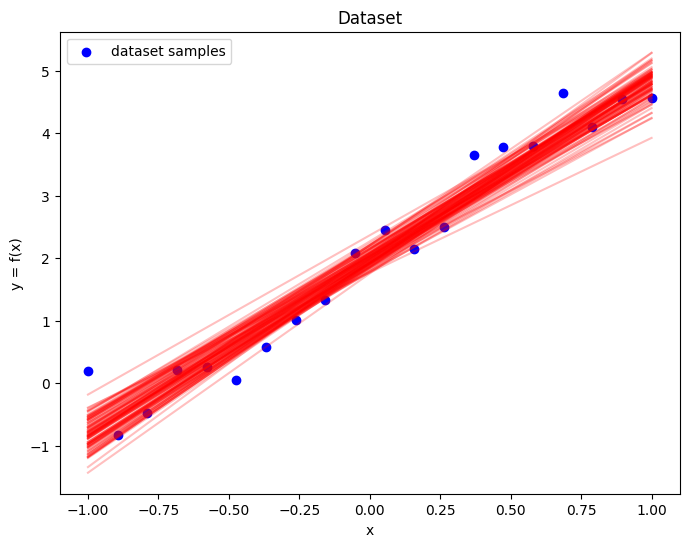

In [26]:
# sample theta from posterior and plot the lines

theta_samples = theta_posterior.sample((100,))
print(theta_samples)

def plot_lines(theta_samples, x=x, y=y):
    x_thetas = torch.linspace(-1, 1, 100)
    plt.figure(figsize=(8, 6))

    for theta in theta_samples:
        plt.plot(x_thetas, forward(x_thetas, theta), color='red', alpha=0.25)
    plt.scatter(x, y, label='dataset samples', color='blue')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y = f(x)')
    # plt.xlim(-1, 1)
    # plt.ylim(-2, 5)
    plt.title('Dataset')
    plt.show()

plot_lines(theta_samples)

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/638850595.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(theta_mle[0], theta_mle[1], 'ro', label='theta_mle', markersize=7, marker='x')


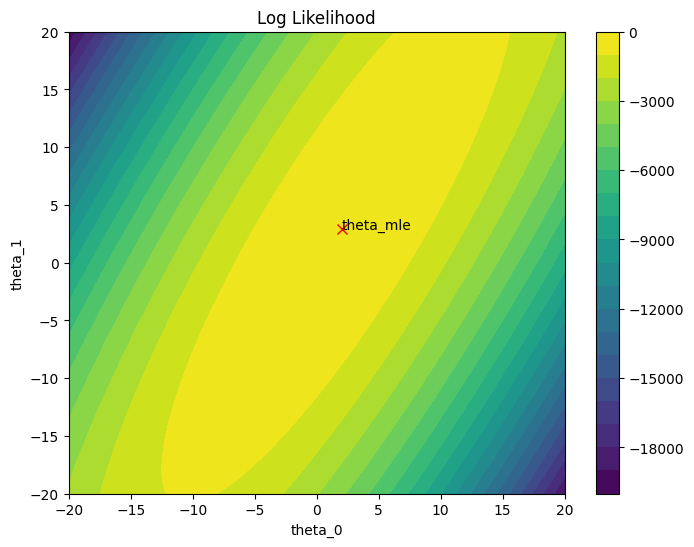

In [35]:
plot_likelihood(theta_mle, x[:10], y[:10])

In [28]:
# get the last sample from x and y
x[-1], y[-1]
n = 20
x_del = x[-n:]
y_del = y[-n:]
X_del = torch.tensor(np.column_stack((np.ones_like(x_del), x_del)))

# y_del = np.array(y_del)
# X_del = np.array(X_del)
# y_del
y_del = torch.tensor(y_del)
# X_del = torch.tensor([X_del])
y_del
X_del

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/1052455046.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_del = torch.tensor(y_del)


tensor([[ 1.0000, -1.0000],
        [ 1.0000, -0.8947],
        [ 1.0000, -0.7895],
        [ 1.0000, -0.6842],
        [ 1.0000, -0.5789],
        [ 1.0000, -0.4737],
        [ 1.0000, -0.3684],
        [ 1.0000, -0.2632],
        [ 1.0000, -0.1579],
        [ 1.0000, -0.0526],
        [ 1.0000,  0.0526],
        [ 1.0000,  0.1579],
        [ 1.0000,  0.2632],
        [ 1.0000,  0.3684],
        [ 1.0000,  0.4737],
        [ 1.0000,  0.5789],
        [ 1.0000,  0.6842],
        [ 1.0000,  0.7895],
        [ 1.0000,  0.8947],
        [ 1.0000,  1.0000]])

In [29]:
sigma_posterior_del_2 = torch.inverse(torch.inverse(sigma_posterior) - (X_del.T @ X_del)/(sigma**2))
print(sigma_posterior_del_2)

tensor([[1., 0.],
        [0., 1.]])


In [30]:
# use solve to get the prior mean and covariance after deleting the last sample
B = torch.inverse(torch.inverse(sigma_posterior) - (X_del.T @ X_del) / ((sigma)**2))
sigma_posterior_del_1 = np.linalg.solve(np.eye(B.shape[0]),B)
sigma_posterior_del_1

array([[1., 0.],
       [0., 1.]])

In [31]:
mean_posterior_del = sigma_posterior_del_1 @ np.array(torch.inverse(sigma_posterior) @ mean_posterior - (X_del.T @ y_del) / ((sigma)**2))
mean_posterior_del

array([0.00000000e+00, 7.62939453e-06])

/var/folders/nf/tcn1v_gx4pvc23db1_jd0_zr0000gq/T/ipykernel_40861/3288201228.py:18: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(2, 3, 'ro', label='true theta', markersize=7, marker='x')


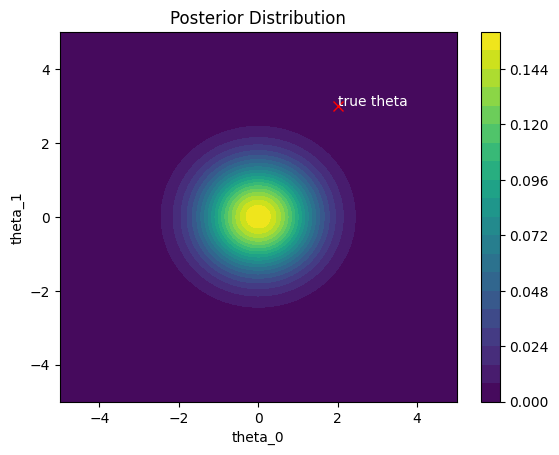

In [32]:
posterior_unlearned_1_data = torch.distributions.MultivariateNormal(torch.tensor(mean_posterior_del), torch.tensor(sigma_posterior_del_1))
plot_contourf_dist(posterior_unlearned_1_data)

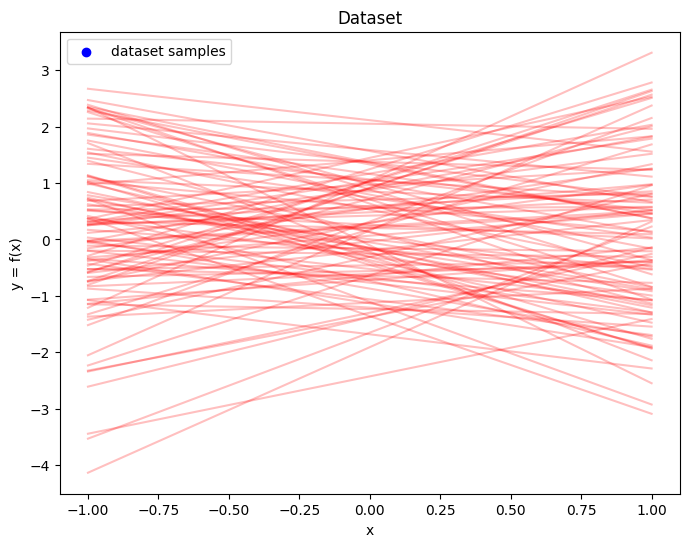

In [33]:
theta_samples = posterior_unlearned_1_data.sample((100,))
# print(theta_samples)

plot_lines(theta_samples, x=x[:-n], y=y[:-n])

In [34]:
# Deleting n samples from the dataset (from the end)

def delete_samples(n):
    x_del = x[-n:]
    y_del = y[-n:]
    X_del = torch.tensor(np.column_stack((np.ones_like(x_del), x_del)))
    if n == 1:
        y_del = torch.tensor([y_del])
    B = torch.inverse(torch.inverse(sigma_posterior) - (X_del.T @ X_del) / ((sigma)**2))
    sigma_posterior_del = np.linalg.solve(np.eye(B.shape[0]),B)
    mean_posterior_del = sigma_posterior_del @ np.array(torch.inverse(sigma_posterior) @ mean_posterior - (X_del.T @ y_del) / ((sigma)**2))
    posterior_unlearned_data = torch.distributions.MultivariateNormal(torch.tensor(mean_posterior_del), torch.tensor(sigma_posterior_del))
    plot_contourf_dist(posterior_unlearned_data)
    plt.show()

# get interactive slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

interact(delete_samples, n=widgets.IntSlider(min=1, max=20, step=1, value=1))


interactive(children=(IntSlider(value=1, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

<function __main__.delete_samples(n)>